In [77]:
import numpy as np
import pandas as pd
import seaborn as sns
from sklearn import datasets
import matplotlib.pyplot as plt
%matplotlib inline
from mpl_toolkits.mplot3d import Axes3D
from collections import Counter
import time
from datetime import datetime
from sklearn.ensemble import RandomForestClassifier
from sklearn.neighbors import KNeighborsClassifier
from sklearn.model_selection import GridSearchCV, cross_val_score, StratifiedKFold, learning_curve, train_test_split, KFold
from sklearn.metrics import accuracy_score, mean_squared_error, confusion_matrix, classification_report, plot_confusion_matrix

In [2]:
df = pd.read_csv("adult-all.csv")

In [3]:
df.head()

,age,workclass,fnlwgt (ignore),education,education-num,marital-status,occupation,relationship,race,sex,capital-gain,capital-loss,hours-per-week,native-country,salary
0,39,State-gov,77516,Bachelors,13,Never-married,Adm-clerical,Not-in-family,White,Male,2174,0,40,United-States,<=50K
1,50,Self-emp-not-inc,83311,Bachelors,13,Married-civ-spouse,Exec-managerial,Husband,White,Male,0,0,13,United-States,<=50K
2,38,Private,215646,HS-grad,9,Divorced,Handlers-cleaners,Not-in-family,White,Male,0,0,40,United-States,<=50K
3,53,Private,234721,11th,7,Married-civ-spouse,Handlers-cleaners,Husband,Black,Male,0,0,40,United-States,<=50K
4,28,Private,338409,Bachelors,13,Married-civ-spouse,Prof-specialty,Wife,Black,Female,0,0,40,Cuba,<=50K


In [4]:
df.replace("?", np.nan, inplace = True)
df.head(5)

,age,workclass,fnlwgt (ignore),education,education-num,marital-status,occupation,relationship,race,sex,capital-gain,capital-loss,hours-per-week,native-country,salary
0,39,State-gov,77516,Bachelors,13,Never-married,Adm-clerical,Not-in-family,White,Male,2174,0,40,United-States,<=50K
1,50,Self-emp-not-inc,83311,Bachelors,13,Married-civ-spouse,Exec-managerial,Husband,White,Male,0,0,13,United-States,<=50K
2,38,Private,215646,HS-grad,9,Divorced,Handlers-cleaners,Not-in-family,White,Male,0,0,40,United-States,<=50K
3,53,Private,234721,11th,7,Married-civ-spouse,Handlers-cleaners,Husband,Black,Male,0,0,40,United-States,<=50K
4,28,Private,338409,Bachelors,13,Married-civ-spouse,Prof-specialty,Wife,Black,Female,0,0,40,Cuba,<=50K


In [5]:
df.shape

(48842, 15)

In [6]:
missing_data = df.isnull()
missing_data.sum()

age                   0
workclass          2799
fnlwgt (ignore)       0
education             0
education-num         0
marital-status        0
occupation         2809
relationship          0
race                  0
sex                   0
capital-gain          0
capital-loss          0
hours-per-week        0
native-country      857
salary                0
dtype: int64

In [7]:
missing_col = []
for column in missing_data.columns.values.tolist():
    if(missing_data[column].sum() > 0):
        print("Column: ",column)
        print("Missing Data: {} ({:.2f}%)".format(missing_data[column].sum(), (missing_data[column].sum() * 100/ len(df))))
        print("Data Type: ",df[column].dtypes)
        print("")
        missing_col.append(column)

Column:  workclass
Missing Data: 2799 (5.73%)
Data Type:  object

Column:  occupation
Missing Data: 2809 (5.75%)
Data Type:  object

Column:  native-country
Missing Data: 857 (1.75%)
Data Type:  object



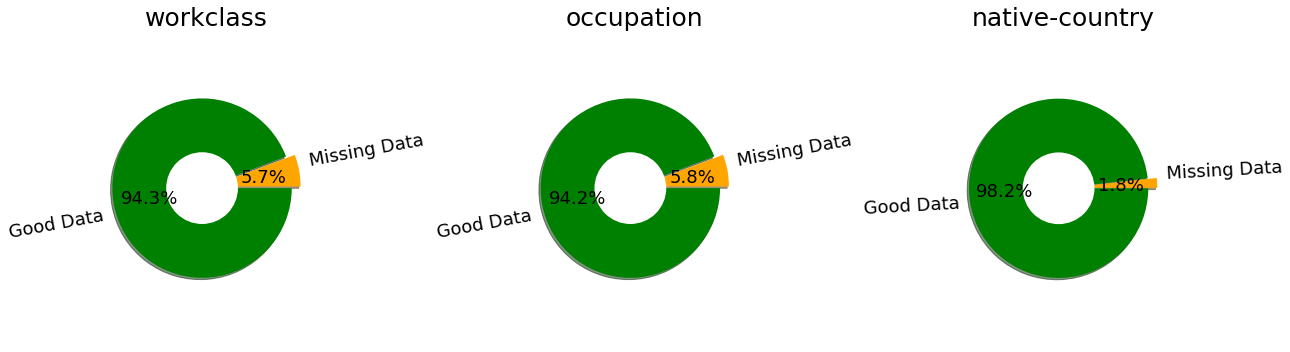

In [8]:
fig1 = plt.figure(figsize=(18,5))
i = 0
for column in missing_col:
    bad = missing_data[column].sum()
    good = len(df) - missing_data[column].sum()
    x = [bad, good]
    labels = ["Missing Data", "Good Data"]
    explode = (0.1, 0)
    i = i+1
    ax = fig1.add_subplot(1,3,i)
    ax.pie(x,explode = explode, labels = labels, shadow = True,autopct='%1.1f%%', colors = ['orange', 'green'],rotatelabels = True, textprops={'fontsize': 18})
    centre_circle = plt.Circle((0,0),0.4,color='black', fc='white',linewidth=0)
    fig = plt.gcf()
    fig.gca().add_artist(centre_circle)
    ax.axis('equal')
    ax.set_title(column, fontsize = 25)
plt.tight_layout()
plt.show()

In [9]:
# Reformat Column We Are Predicting
df['salary']=df['salary'].map({'<=50K': 0, '>50K': 1, '<=50K.': 0, '>50K.': 1})
df.head(4)

,age,workclass,fnlwgt (ignore),education,education-num,marital-status,occupation,relationship,race,sex,capital-gain,capital-loss,hours-per-week,native-country,salary
0,39,State-gov,77516,Bachelors,13,Never-married,Adm-clerical,Not-in-family,White,Male,2174,0,40,United-States,0
1,50,Self-emp-not-inc,83311,Bachelors,13,Married-civ-spouse,Exec-managerial,Husband,White,Male,0,0,13,United-States,0
2,38,Private,215646,HS-grad,9,Divorced,Handlers-cleaners,Not-in-family,White,Male,0,0,40,United-States,0
3,53,Private,234721,11th,7,Married-civ-spouse,Handlers-cleaners,Husband,Black,Male,0,0,40,United-States,0


In [10]:
# Identify Numeric features
numeric_features = ['age', 'fnlwgt (ignore)', 'education-num','capital-gain','capital-loss','hours-per-week','salary']

# Identify Categorical features
cat_features = ['workclass','education','marital-status', 'occupation', 'relationship', 'race', 'sex', 'native-country']

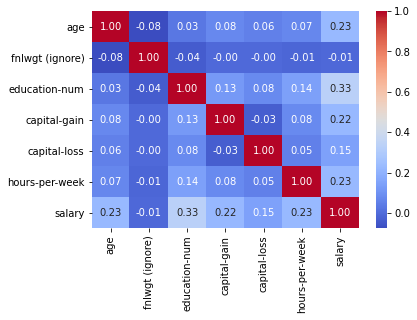

In [11]:
# Correlation matrix between numerical values
g = sns.heatmap(df[numeric_features].corr(),annot=True, fmt = ".2f", cmap = "coolwarm")
plt.show()

C:\Users\hp\anaconda3\lib\site-packages\seaborn\categorical.py:3714: UserWarning: The `factorplot` function has been renamed to `catplot`. The original name will be removed in a future release. Please update your code. Note that the default `kind` in `factorplot` (`'point'`) has changed `'strip'` in `catplot`.
  warnings.warn(msg)
C:\Users\hp\anaconda3\lib\site-packages\seaborn\categorical.py:3720: UserWarning: The `size` parameter has been renamed to `height`; please update your code.
  warnings.warn(msg, UserWarning)


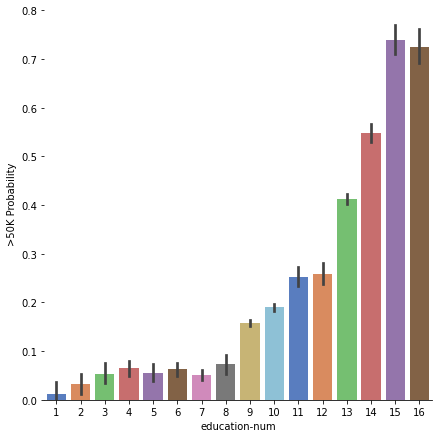

In [12]:
# Explore Education Num vs Income
g = sns.factorplot(x="education-num",y="salary",data=df,kind="bar",size = 6,palette = "muted")
g.despine(left=True)
g = g.set_ylabels(">50K Probability")

C:\Users\hp\anaconda3\lib\site-packages\seaborn\categorical.py:3714: UserWarning: The `factorplot` function has been renamed to `catplot`. The original name will be removed in a future release. Please update your code. Note that the default `kind` in `factorplot` (`'point'`) has changed `'strip'` in `catplot`.
  warnings.warn(msg)
C:\Users\hp\anaconda3\lib\site-packages\seaborn\categorical.py:3720: UserWarning: The `size` parameter has been renamed to `height`; please update your code.
  warnings.warn(msg, UserWarning)


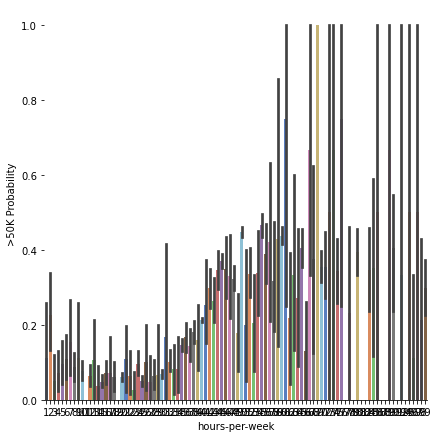

In [13]:
# Explore Hours Per Week vs Income
g  = sns.factorplot(x="hours-per-week",y="salary",data=df,kind="bar",size = 6,palette = "muted")
g.despine(left=True)
g = g.set_ylabels(">50K Probability")

C:\Users\hp\anaconda3\lib\site-packages\seaborn\distributions.py:2557: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)
C:\Users\hp\anaconda3\lib\site-packages\seaborn\distributions.py:2557: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


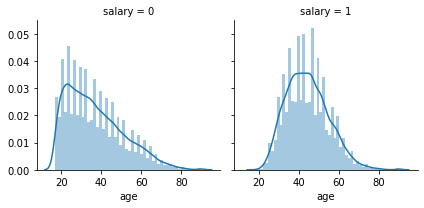

In [14]:
# Explore Age vs Income
g = sns.FacetGrid(df, col='salary')
g = g.map(sns.distplot, "age")
plt.show()

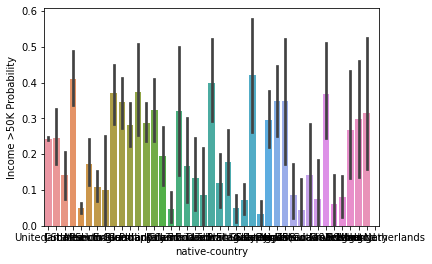

In [15]:
# Explore Native Nation vs Income
g = sns.barplot(x="native-country",y="salary",data=df)
g = g.set_ylabel("Income >50K Probability")
plt.show()

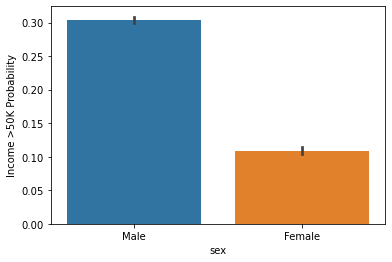

In [16]:
# Explore Sex vs Income
g = sns.barplot(x="sex",y="salary",data=df)
g = g.set_ylabel("Income >50K Probability")
plt.show()

C:\Users\hp\anaconda3\lib\site-packages\seaborn\categorical.py:3714: UserWarning: The `factorplot` function has been renamed to `catplot`. The original name will be removed in a future release. Please update your code. Note that the default `kind` in `factorplot` (`'point'`) has changed `'strip'` in `catplot`.
  warnings.warn(msg)
C:\Users\hp\anaconda3\lib\site-packages\seaborn\categorical.py:3720: UserWarning: The `size` parameter has been renamed to `height`; please update your code.
  warnings.warn(msg, UserWarning)


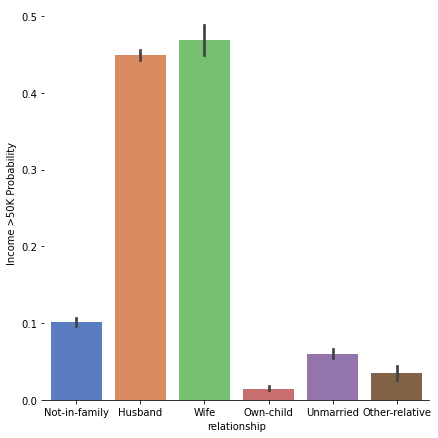

In [17]:
# Explore Relationship vs Income
g = sns.factorplot(x="relationship",y="salary",data=df,kind="bar", size = 6 ,
palette = "muted")
g.despine(left=True)
g = g.set_ylabels("Income >50K Probability")
plt.show()

C:\Users\hp\anaconda3\lib\site-packages\seaborn\categorical.py:3714: UserWarning: The `factorplot` function has been renamed to `catplot`. The original name will be removed in a future release. Please update your code. Note that the default `kind` in `factorplot` (`'point'`) has changed `'strip'` in `catplot`.
  warnings.warn(msg)
C:\Users\hp\anaconda3\lib\site-packages\seaborn\categorical.py:3720: UserWarning: The `size` parameter has been renamed to `height`; please update your code.
  warnings.warn(msg, UserWarning)


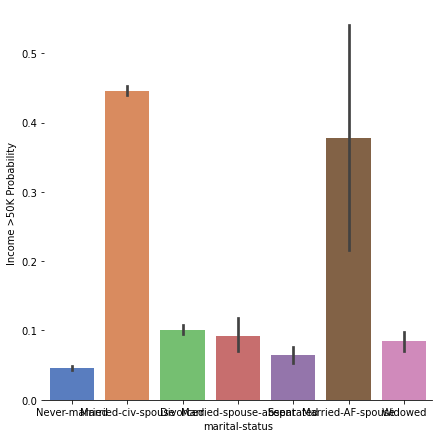

In [18]:
# Explore Marital Status vs Income
g = sns.factorplot(x="marital-status",y="salary",data=df,kind="bar", size = 6 ,
palette = "muted")
g.despine(left=True)
g = g.set_ylabels("Income >50K Probability")
plt.show()

C:\Users\hp\anaconda3\lib\site-packages\seaborn\categorical.py:3714: UserWarning: The `factorplot` function has been renamed to `catplot`. The original name will be removed in a future release. Please update your code. Note that the default `kind` in `factorplot` (`'point'`) has changed `'strip'` in `catplot`.
  warnings.warn(msg)
C:\Users\hp\anaconda3\lib\site-packages\seaborn\categorical.py:3720: UserWarning: The `size` parameter has been renamed to `height`; please update your code.
  warnings.warn(msg, UserWarning)


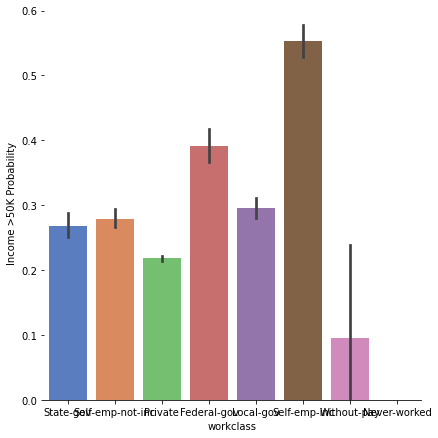

In [19]:
# Explore Workclass vs Income
g = sns.factorplot(x="workclass",y="salary",data=df,kind="bar", size = 6 ,
palette = "muted")
g.despine(left=True)
g = g.set_ylabels("Income >50K Probability")
plt.show()

In [20]:
# Calculate Mode
workclass_mode = df['workclass'].value_counts().idxmax()
occupation_mode = df['occupation'].value_counts().idxmax()
native_country_mode = df['native-country'].value_counts().idxmax()

In [21]:
print("Mode of workclass: ",workclass_mode)
print("Mode of Occupation: ",occupation_mode)
print("Mode of natice.country: ",native_country_mode)

Mode of workclass:  Private
Mode of Occupation:  Prof-specialty
Mode of natice.country:  United-States


In [22]:
df_manual = df

In [23]:
#replace the missing categorical values by the most frequent value
df_manual["workclass"].replace(np.nan, workclass_mode, inplace = True)
df_manual["occupation"].replace(np.nan, occupation_mode, inplace = True)
df_manual["native-country"].replace(np.nan, native_country_mode, inplace = True)

In [24]:
df_manual.isnull().sum()

age                0
workclass          0
fnlwgt (ignore)    0
education          0
education-num      0
marital-status     0
occupation         0
relationship       0
race               0
sex                0
capital-gain       0
capital-loss       0
hours-per-week     0
native-country     0
salary             0
dtype: int64

In [25]:
count = 0
for column in df_manual.columns.values.tolist():
    if df_manual[column].dtype == 'object':
        print("Column Name: ",column)
        print("Data Type: ", df_manual[column].dtypes)
        print("")
        count = count + 1
print("Count : ",count)

Column Name:  workclass
Data Type:  object

Column Name:  education
Data Type:  object

Column Name:  marital-status
Data Type:  object

Column Name:  occupation
Data Type:  object

Column Name:  relationship
Data Type:  object

Column Name:  race
Data Type:  object

Column Name:  sex
Data Type:  object

Column Name:  native-country
Data Type:  object

Count :  8


In [26]:
dummy = pd.get_dummies(df_manual["workclass"])
dummy.head()

,Federal-gov,Local-gov,Never-worked,Private,Self-emp-inc,Self-emp-not-inc,State-gov,Without-pay
0,0,0,0,0,0,0,1,0
1,0,0,0,0,0,1,0,0
2,0,0,0,1,0,0,0,0
3,0,0,0,1,0,0,0,0
4,0,0,0,1,0,0,0,0


In [27]:
#Rename column names
dummy.rename(columns={'Federal-gov':'work-Federal-gov', 
                      'Local-gov':'work-Local-gov',
                      'Private': 'work-Private',
                      'Self-emp-inc': 'work-Self-emp-inc',
                      'Self-emp-not-inc': 'Self-emp-not-inc',
                      'State-gov': 'work-State-gov',
                      'Without-pay' : 'work-Without-pay'}, inplace=True)
dummy.head()

,work-Federal-gov,work-Local-gov,Never-worked,work-Private,work-Self-emp-inc,Self-emp-not-inc,work-State-gov,work-Without-pay
0,0,0,0,0,0,0,1,0
1,0,0,0,0,0,1,0,0
2,0,0,0,1,0,0,0,0
3,0,0,0,1,0,0,0,0
4,0,0,0,1,0,0,0,0


In [28]:
dummy.drop("Never-worked", axis = 1, inplace=True)
dummy.head()

,work-Federal-gov,work-Local-gov,work-Private,work-Self-emp-inc,Self-emp-not-inc,work-State-gov,work-Without-pay
0,0,0,0,0,0,1,0
1,0,0,0,0,1,0,0
2,0,0,1,0,0,0,0
3,0,0,1,0,0,0,0
4,0,0,1,0,0,0,0


In [29]:
# merge data frame "df" and "dummy" 
df_manual = pd.concat([df_manual, dummy], axis=1)

# drop original column "workplace" from "df"
df_manual.drop("workclass", axis = 1, inplace=True)
df_manual.head()

,age,fnlwgt (ignore),education,education-num,marital-status,occupation,relationship,race,sex,capital-gain,...,hours-per-week,native-country,salary,work-Federal-gov,work-Local-gov,work-Private,work-Self-emp-inc,Self-emp-not-inc,work-State-gov,work-Without-pay
0,39,77516,Bachelors,13,Never-married,Adm-clerical,Not-in-family,White,Male,2174,...,40,United-States,0,0,0,0,0,0,1,0
1,50,83311,Bachelors,13,Married-civ-spouse,Exec-managerial,Husband,White,Male,0,...,13,United-States,0,0,0,0,0,1,0,0
2,38,215646,HS-grad,9,Divorced,Handlers-cleaners,Not-in-family,White,Male,0,...,40,United-States,0,0,0,1,0,0,0,0
3,53,234721,11th,7,Married-civ-spouse,Handlers-cleaners,Husband,Black,Male,0,...,40,United-States,0,0,0,1,0,0,0,0
4,28,338409,Bachelors,13,Married-civ-spouse,Prof-specialty,Wife,Black,Female,0,...,40,Cuba,0,0,0,1,0,0,0,0


In [30]:
dummy = pd.get_dummies(df_manual["education"])
dummy.head()

,10th,11th,12th,1st-4th,5th-6th,7th-8th,9th,Assoc-acdm,Assoc-voc,Bachelors,Doctorate,HS-grad,Masters,Preschool,Prof-school,Some-college
0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0
1,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0
2,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0
3,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0
4,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0


In [31]:
dummy.drop("Some-college", axis = 1, inplace=True)
dummy.head()

,10th,11th,12th,1st-4th,5th-6th,7th-8th,9th,Assoc-acdm,Assoc-voc,Bachelors,Doctorate,HS-grad,Masters,Preschool,Prof-school
0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0
1,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0
2,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0
3,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0
4,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0


In [32]:
# merge data frame "df" and "dummy_variable_1" 
df_manual = pd.concat([df_manual, dummy], axis=1)

# drop original column "fuel-type" from "df"
df_manual.drop("education", axis = 1, inplace=True)
df_manual.head()

,age,fnlwgt (ignore),education-num,marital-status,occupation,relationship,race,sex,capital-gain,capital-loss,...,7th-8th,9th,Assoc-acdm,Assoc-voc,Bachelors,Doctorate,HS-grad,Masters,Preschool,Prof-school
0,39,77516,13,Never-married,Adm-clerical,Not-in-family,White,Male,2174,0,...,0,0,0,0,1,0,0,0,0,0
1,50,83311,13,Married-civ-spouse,Exec-managerial,Husband,White,Male,0,0,...,0,0,0,0,1,0,0,0,0,0
2,38,215646,9,Divorced,Handlers-cleaners,Not-in-family,White,Male,0,0,...,0,0,0,0,0,0,1,0,0,0
3,53,234721,7,Married-civ-spouse,Handlers-cleaners,Husband,Black,Male,0,0,...,0,0,0,0,0,0,0,0,0,0
4,28,338409,13,Married-civ-spouse,Prof-specialty,Wife,Black,Female,0,0,...,0,0,0,0,1,0,0,0,0,0


In [33]:
dummy = pd.get_dummies(df_manual["marital-status"])
dummy.head()

,Divorced,Married-AF-spouse,Married-civ-spouse,Married-spouse-absent,Never-married,Separated,Widowed
0,0,0,0,0,1,0,0
1,0,0,1,0,0,0,0
2,1,0,0,0,0,0,0
3,0,0,1,0,0,0,0
4,0,0,1,0,0,0,0


In [34]:
dummy.drop("Never-married", axis = 1, inplace=True)
# merge data frame "df" and "dummy_variable_1" 
df_manual = pd.concat([df_manual, dummy], axis=1)

# drop original column "fuel-type" from "df"
df_manual.drop("marital-status", axis = 1, inplace=True)
df_manual.head()

,age,fnlwgt (ignore),education-num,occupation,relationship,race,sex,capital-gain,capital-loss,hours-per-week,...,HS-grad,Masters,Preschool,Prof-school,Divorced,Married-AF-spouse,Married-civ-spouse,Married-spouse-absent,Separated,Widowed
0,39,77516,13,Adm-clerical,Not-in-family,White,Male,2174,0,40,...,0,0,0,0,0,0,0,0,0,0
1,50,83311,13,Exec-managerial,Husband,White,Male,0,0,13,...,0,0,0,0,0,0,1,0,0,0
2,38,215646,9,Handlers-cleaners,Not-in-family,White,Male,0,0,40,...,1,0,0,0,1,0,0,0,0,0
3,53,234721,7,Handlers-cleaners,Husband,Black,Male,0,0,40,...,0,0,0,0,0,0,1,0,0,0
4,28,338409,13,Prof-specialty,Wife,Black,Female,0,0,40,...,0,0,0,0,0,0,1,0,0,0


In [35]:
dummy = pd.get_dummies(df_manual["occupation"])
dummy.head()

,Adm-clerical,Armed-Forces,Craft-repair,Exec-managerial,Farming-fishing,Handlers-cleaners,Machine-op-inspct,Other-service,Priv-house-serv,Prof-specialty,Protective-serv,Sales,Tech-support,Transport-moving
0,1,0,0,0,0,0,0,0,0,0,0,0,0,0
1,0,0,0,1,0,0,0,0,0,0,0,0,0,0
2,0,0,0,0,0,1,0,0,0,0,0,0,0,0
3,0,0,0,0,0,1,0,0,0,0,0,0,0,0
4,0,0,0,0,0,0,0,0,0,1,0,0,0,0


In [36]:
dummy.drop("Other-service", axis = 1, inplace=True)
# merge data frame "df" and "dummy_variable_1" 
df_manual = pd.concat([df_manual, dummy], axis=1)

# drop original column "fuel-type" from "df"
df_manual.drop("occupation", axis = 1, inplace=True)
df_manual.head()

,age,fnlwgt (ignore),education-num,relationship,race,sex,capital-gain,capital-loss,hours-per-week,native-country,...,Exec-managerial,Farming-fishing,Handlers-cleaners,Machine-op-inspct,Priv-house-serv,Prof-specialty,Protective-serv,Sales,Tech-support,Transport-moving
0,39,77516,13,Not-in-family,White,Male,2174,0,40,United-States,...,0,0,0,0,0,0,0,0,0,0
1,50,83311,13,Husband,White,Male,0,0,13,United-States,...,1,0,0,0,0,0,0,0,0,0
2,38,215646,9,Not-in-family,White,Male,0,0,40,United-States,...,0,0,1,0,0,0,0,0,0,0
3,53,234721,7,Husband,Black,Male,0,0,40,United-States,...,0,0,1,0,0,0,0,0,0,0
4,28,338409,13,Wife,Black,Female,0,0,40,Cuba,...,0,0,0,0,0,1,0,0,0,0


In [37]:
dummy = pd.get_dummies(df_manual["relationship"])
dummy.head()

,Husband,Not-in-family,Other-relative,Own-child,Unmarried,Wife
0,0,1,0,0,0,0
1,1,0,0,0,0,0
2,0,1,0,0,0,0
3,1,0,0,0,0,0
4,0,0,0,0,0,1


In [38]:
dummy.drop("Other-relative", axis = 1, inplace=True)
# merge data frame "df" and "dummy_variable_1" 
df_manual = pd.concat([df_manual, dummy], axis=1)

# drop original column "fuel-type" from "df"
df_manual.drop("relationship", axis = 1, inplace=True)
df_manual.head()

,age,fnlwgt (ignore),education-num,race,sex,capital-gain,capital-loss,hours-per-week,native-country,salary,...,Prof-specialty,Protective-serv,Sales,Tech-support,Transport-moving,Husband,Not-in-family,Own-child,Unmarried,Wife
0,39,77516,13,White,Male,2174,0,40,United-States,0,...,0,0,0,0,0,0,1,0,0,0
1,50,83311,13,White,Male,0,0,13,United-States,0,...,0,0,0,0,0,1,0,0,0,0
2,38,215646,9,White,Male,0,0,40,United-States,0,...,0,0,0,0,0,0,1,0,0,0
3,53,234721,7,Black,Male,0,0,40,United-States,0,...,0,0,0,0,0,1,0,0,0,0
4,28,338409,13,Black,Female,0,0,40,Cuba,0,...,1,0,0,0,0,0,0,0,0,1


In [39]:
dummy = pd.get_dummies(df_manual["race"])
dummy.head()

,Amer-Indian-Eskimo,Asian-Pac-Islander,Black,Other,White
0,0,0,0,0,1
1,0,0,0,0,1
2,0,0,0,0,1
3,0,0,1,0,0
4,0,0,1,0,0


In [40]:
dummy.drop("Other", axis = 1, inplace=True)
# merge data frame "df" and "dummy_variable_1" 
df_manual = pd.concat([df_manual, dummy], axis=1)

# drop original column "fuel-type" from "df"
df_manual.drop("race", axis = 1, inplace=True)
df_manual.head()

,age,fnlwgt (ignore),education-num,sex,capital-gain,capital-loss,hours-per-week,native-country,salary,work-Federal-gov,...,Transport-moving,Husband,Not-in-family,Own-child,Unmarried,Wife,Amer-Indian-Eskimo,Asian-Pac-Islander,Black,White
0,39,77516,13,Male,2174,0,40,United-States,0,0,...,0,0,1,0,0,0,0,0,0,1
1,50,83311,13,Male,0,0,13,United-States,0,0,...,0,1,0,0,0,0,0,0,0,1
2,38,215646,9,Male,0,0,40,United-States,0,0,...,0,0,1,0,0,0,0,0,0,1
3,53,234721,7,Male,0,0,40,United-States,0,0,...,0,1,0,0,0,0,0,0,1,0
4,28,338409,13,Female,0,0,40,Cuba,0,0,...,0,0,0,0,0,1,0,0,1,0


In [41]:
dummy = pd.get_dummies(df_manual["sex"])
dummy.head()

,Female,Male
0,0,1
1,0,1
2,0,1
3,0,1
4,1,0


In [42]:
dummy.drop("Male", axis = 1, inplace=True)
dummy.rename(columns={ 'Female' : 'Female/Male'}, inplace = True)
# merge data frame "df" and "dummy_variable_1" 
df_manual = pd.concat([df_manual, dummy], axis=1)
# drop original column "fuel-type" from "df"
df_manual.drop("sex", axis = 1, inplace=True)
df_manual.head()

,age,fnlwgt (ignore),education-num,capital-gain,capital-loss,hours-per-week,native-country,salary,work-Federal-gov,work-Local-gov,...,Husband,Not-in-family,Own-child,Unmarried,Wife,Amer-Indian-Eskimo,Asian-Pac-Islander,Black,White,Female/Male
0,39,77516,13,2174,0,40,United-States,0,0,0,...,0,1,0,0,0,0,0,0,1,0
1,50,83311,13,0,0,13,United-States,0,0,0,...,1,0,0,0,0,0,0,0,1,0
2,38,215646,9,0,0,40,United-States,0,0,0,...,0,1,0,0,0,0,0,0,1,0
3,53,234721,7,0,0,40,United-States,0,0,0,...,1,0,0,0,0,0,0,1,0,0
4,28,338409,13,0,0,40,Cuba,0,0,0,...,0,0,0,0,1,0,0,1,0,1


In [43]:
dummy = pd.get_dummies(df_manual["native-country"])
dummy.head()

,Cambodia,Canada,China,Columbia,Cuba,Dominican-Republic,Ecuador,El-Salvador,England,France,...,Portugal,Puerto-Rico,Scotland,South,Taiwan,Thailand,Trinadad&Tobago,United-States,Vietnam,Yugoslavia
0,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,1,0,0
1,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,1,0,0
2,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,1,0,0
3,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,1,0,0
4,0,0,0,0,1,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0


In [44]:
# merge data frame "df" and "dummy_variable_1" 
df_manual = pd.concat([df_manual, dummy], axis=1)
# drop original column "fuel-type" from "df"
df_manual.drop("native-country", axis = 1, inplace=True)
df_manual.head()

,age,fnlwgt (ignore),education-num,capital-gain,capital-loss,hours-per-week,salary,work-Federal-gov,work-Local-gov,work-Private,...,Portugal,Puerto-Rico,Scotland,South,Taiwan,Thailand,Trinadad&Tobago,United-States,Vietnam,Yugoslavia
0,39,77516,13,2174,0,40,0,0,0,0,...,0,0,0,0,0,0,0,1,0,0
1,50,83311,13,0,0,13,0,0,0,0,...,0,0,0,0,0,0,0,1,0,0
2,38,215646,9,0,0,40,0,0,0,1,...,0,0,0,0,0,0,0,1,0,0
3,53,234721,7,0,0,40,0,0,0,1,...,0,0,0,0,0,0,0,1,0,0
4,28,338409,13,0,0,40,0,0,0,1,...,0,0,0,0,0,0,0,0,0,0


In [45]:
dummy = pd.get_dummies(df_manual["salary"])
dummy.head()

,0,1
0,1,0
1,1,0
2,1,0
3,1,0
4,1,0


In [46]:
dummy.rename(columns={ '1' : 'Salary > 50K'}, inplace = True)

In [47]:
dummy.drop(0, axis = 1, inplace = True)

In [48]:
df_manual = pd.concat([df_manual, dummy], axis=1)
df_manual.drop("salary", axis = 1, inplace=True)
df_manual.head()

,age,fnlwgt (ignore),education-num,capital-gain,capital-loss,hours-per-week,work-Federal-gov,work-Local-gov,work-Private,work-Self-emp-inc,...,Puerto-Rico,Scotland,South,Taiwan,Thailand,Trinadad&Tobago,United-States,Vietnam,Yugoslavia,1
0,39,77516,13,2174,0,40,0,0,0,0,...,0,0,0,0,0,0,1,0,0,0
1,50,83311,13,0,0,13,0,0,0,0,...,0,0,0,0,0,0,1,0,0,0
2,38,215646,9,0,0,40,0,0,1,0,...,0,0,0,0,0,0,1,0,0,0
3,53,234721,7,0,0,40,0,0,1,0,...,0,0,0,0,0,0,1,0,0,0
4,28,338409,13,0,0,40,0,0,1,0,...,0,0,0,0,0,0,0,0,0,0


In [49]:
df_manual.dtypes

age                int64
fnlwgt (ignore)    int64
education-num      int64
capital-gain       int64
capital-loss       int64
                   ...  
Trinadad&Tobago    uint8
United-States      uint8
Vietnam            uint8
Yugoslavia         uint8
1                  uint8
Length: 99, dtype: object

In [50]:
X = df_manual.iloc[:,:-1].values
y = df_manual[1].iloc[:].values

In [51]:
df_manual.describe(include = 'all')

,age,fnlwgt (ignore),education-num,capital-gain,capital-loss,hours-per-week,work-Federal-gov,work-Local-gov,work-Private,work-Self-emp-inc,...,Puerto-Rico,Scotland,South,Taiwan,Thailand,Trinadad&Tobago,United-States,Vietnam,Yugoslavia,1
count,48842.000000,4.884200e+04,48842.000000,48842.000000,48842.000000,48842.000000,48842.000000,48842.000000,48842.000000,48842.000000,...,48842.000000,48842.000000,48842.000000,48842.000000,48842.000000,48842.000000,48842.000000,48842.000000,48842.000000,48842.000000
mean,38.643585,1.896641e+05,10.078089,1079.067626,87.502314,40.422382,0.029319,0.064207,0.751505,0.034704,...,0.003767,0.000430,0.002355,0.001331,0.000614,0.000553,0.914971,0.001761,0.000471,0.239282
std,13.710510,1.056040e+05,2.570973,7452.019058,403.004552,12.391444,0.168701,0.245124,0.432145,0.183030,...,0.061263,0.020731,0.048467,0.036457,0.024776,0.023506,0.278928,0.041925,0.021695,0.426649
min,17.000000,1.228500e+04,1.000000,0.000000,0.000000,1.000000,0.000000,0.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,28.000000,1.175505e+05,9.000000,0.000000,0.000000,40.000000,0.000000,0.000000,1.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,1.000000,0.000000,0.000000,0.000000
50%,37.000000,1.781445e+05,10.000000,0.000000,0.000000,40.000000,0.000000,0.000000,1.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,1.000000,0.000000,0.000000,0.000000
75%,48.000000,2.376420e+05,12.000000,0.000000,0.000000,45.000000,0.000000,0.000000,1.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,1.000000,0.000000,0.000000,0.000000
max,90.000000,1.490400e+06,16.000000,99999.000000,4356.000000,99.000000,1.000000,1.000000,1.000000,1.000000,...,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000


In [52]:
from sklearn.preprocessing import StandardScaler
sc = StandardScaler()
X = sc.fit_transform(X)

C:\Users\hp\anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


<AxesSubplot:ylabel='count'>

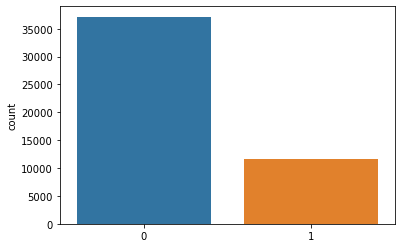

In [53]:
import seaborn as sns
sns.countplot(y)

In [54]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.2, random_state = 0)

In [55]:
random_forest = RandomForestClassifier(n_estimators=100)
random_forest.fit(X_train, y_train)
Y_prediction = random_forest.predict(X_test)
Y_prediction

array([0, 0, 0, ..., 0, 0, 1], dtype=uint8)

In [56]:
random_forest.score(X_train, y_train)
acc_random_forest = round(random_forest.score(X_train, y_train) * 100, 2)
acc_random_forest

99.99

In [76]:
# KNN
k_values = [2, 5, 10]
for i in k_values:
    start_time = datetime.now()
    knn = KNeighborsClassifier(n_neighbors = i)
    knn.fit(X_train, y_train) 
    Y_pred = knn.predict(X_test)
    acc_knn = round(knn.score(X_train, y_train) * 100, 2)
    
    print("K-Value:", i)
    print('Speed:', datetime.now() - start_time)
    print('Accuracy Score is {:.5}'.format(acc_knn))
    print("Confusion Matrix:", pd.DataFrame(confusion_matrix(y_test,Y_pred)))
    print("Classification Report:", classification_report(Y_pred, y_test))
    print("MSE", mean_squared_error(y_test, Y_pred))

K-Value: 2
Speed: 0:04:51.388133
Accuracy Score is 89.55
Confusion Matrix:       0    1
0  7045  427
1  1439  858
Classification Report:               precision    recall  f1-score   support

           0       0.94      0.83      0.88      8484
           1       0.37      0.67      0.48      1285

    accuracy                           0.81      9769
   macro avg       0.66      0.75      0.68      9769
weighted avg       0.87      0.81      0.83      9769

MSE 0.19101238611935714
K-Value: 5
Speed: 0:08:49.299671
Accuracy Score is 87.58
Confusion Matrix:       0     1
0  6782   690
1  1015  1282
Classification Report:               precision    recall  f1-score   support

           0       0.91      0.87      0.89      7797
           1       0.56      0.65      0.60      1972

    accuracy                           0.83      9769
   macro avg       0.73      0.76      0.74      9769
weighted avg       0.84      0.83      0.83      9769

MSE 0.17453168185075238
K-Value: 10
Speed: 0:

In [79]:
cross_val_score(knn, X, y, cv=5, scoring='accuracy')

array([0.83324803, 0.82700379, 0.8297502 , 0.82760033, 0.83005733])